# Reinforcement Learning

# Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**. 

In all considered models, rewards are attached to **states**. In games for instance, the reward of a state is +1 if you win, -1 if you loose, 0 in all other cases.

In [1]:
import numpy as np
import os
from classes.model import Walk, Maze
from classes.model import Environment
from classes.agent import Agent
from classes.model import TicTacToe, Nim, ConnectFour, FiveInRow
from classes.model import Game
from classes.dp import PolicyEvaluation

Each model is an object of the class ``Environment`` storing the current state. 

In [2]:
methods_environment = [method for method in dir(Environment) if '__' not in method]
methods_environment

['decode',
 'display',
 'encode',
 'get_actions',
 'get_model',
 'get_reward',
 'get_states',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reinit_state',
 'step']

In [3]:
methods_agent = [method for method in dir(Agent) if '__' not in method]
methods_agent

['get_action',
 'get_actions',
 'get_episode',
 'get_gains',
 'one_step_policy',
 'random_policy']

## Walk

We start with a walk in a square. Some states (to be found) have positive rewards.

Model size: (5, 5)


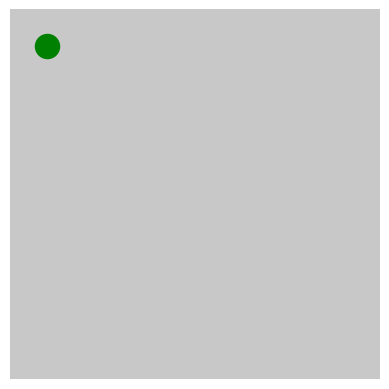

In [4]:
# environment
model = Walk()
print('Model size:', model.Size)
model.display()

In [5]:
# rewards (to be discovered)
model.Rewards

{(0, 0): 1, (0, 4): -1, (4, 0): -2, (4, 4): 2}

In [6]:
state = model.state
print('Present state:', state)

Present state: [0 0]


In [7]:
# action represents the direction of the movement
# can be (0,1), (0,-1), (1,0), (-1,0)
model.get_actions(state)

[(0, 1), (1, 0)]

In [8]:
action = (0, 1)

In [9]:
# the integer returned is the reward
# result: rewards, True if terminal state/False if not
model.step(action)

(0, False)

In [10]:
print('New state:', model.state)

New state: [0 1]


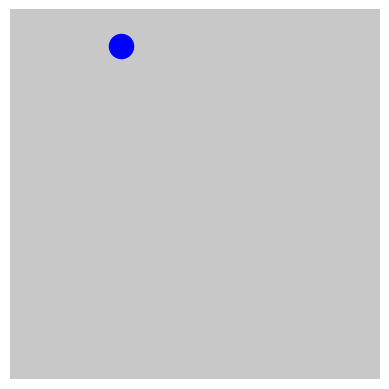

In [11]:
model.display()

In [12]:
# agent with random policy (default)
agent = Agent(model)
state = model.state
action = agent.get_action(state)
print('Current state:', state)
print('Action:', action)

Current state: [0 1]
Action: (0, 1)


In [13]:
reward, stop = model.step(action)
print('Reward:', reward)
print('Stop:', stop) # False means it is not a terminal state, True means it is a terminal state
print('New state:', model.state)

Reward: 0
Stop: False
New state: [0 2]


In [14]:
# all possible actions
agent.get_actions(state)

[(0, 1), (0, -1), (1, 0)]

In [15]:
# policy
probs, actions = agent.policy(state)
print('Probabilities: ',probs)
print('Actions: ', actions)

Probabilities:  [0.33333333 0.33333333 0.33333333]
Actions:  [(0, 1), (0, -1), (1, 0)]


In [16]:
# an episode
# sequence of 100 states after the inital one
stop, states, rewards = agent.get_episode(n_steps=100)

In [17]:
# the episode includes the initial state + the 100 states asked
len(states)

101

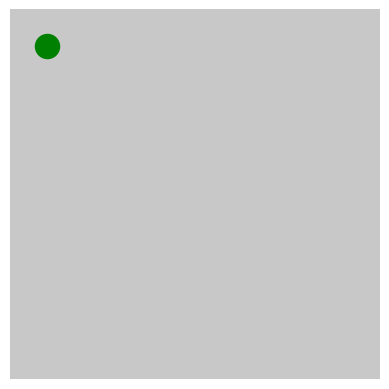

In [18]:
# display
animation = model.display(states)
animation

In [19]:
# initial reward = 0 by convention
len(rewards)

101

In [20]:
np.sum(rewards)

-17

In [21]:
# gains = cumulative rewards
gains = agent.get_gains(n_runs=10000)
gains.mean()

1.424

### Weighted random policy

In [22]:
weights = {(0, 1): 2, (1, 0): 2, (0, -1): 1, (-1, 0): 1}

In [23]:
def weighted_random_policy(state, weights=weights):
    actions = Walk().get_actions(state)
    probs = []
    usable_weights = [weights[action] for action in actions]
    for action in actions:
        probs.append(weights[action]/sum(usable_weights))  
    return probs, actions

In [24]:
agent = Agent(model, policy=weighted_random_policy)

In [25]:
state = model.state
action = agent.get_action(state)
print('State:', state)
print('Action:', action)

State: [4 0]
Action: (0, 1)


In [26]:
reward, stop = model.step(action)
print('Reward:', reward)
print('Stop:', stop)
print('New state:', model.state)

Reward: 0
Stop: False
New state: [4 1]


In [27]:
# all possible actions
agent.get_actions(state)

[(0, 1), (-1, 0)]

In [28]:
# policy
probs, actions = agent.policy(state)
print('Probabilities: ',probs)
print('Actions: ', actions)

Probabilities:  [0.6666666666666666, 0.3333333333333333]
Actions:  [(0, 1), (-1, 0)]


In [29]:
# an episode
# sequence of 100 states after the inital one
stop, states, rewards = agent.get_episode(n_steps=100)

In [30]:
# the episode includes the initial state + the 100 states asked
len(states)

101

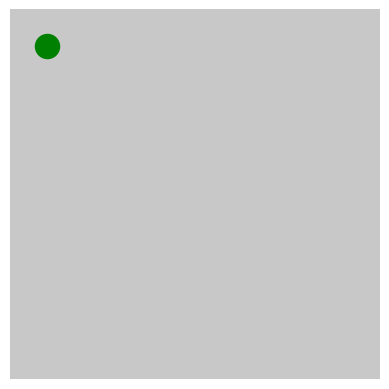

In [31]:
# display
animation = model.display(states)
animation

In [32]:
# initial reward = 0 by convention
len(rewards)

101

In [33]:
np.sum(rewards)

25

In [34]:
# gains = cumulative rewards
gains = agent.get_gains(n_runs=10000)
gains.mean()

21.3861

## Maze

In [2]:
maze_map = np.load(os.path.join('data', 'maze.npy'))

In [36]:
model = Maze()
init_state = (1, 0)
exit_state = (1, 20)
model.set_parameters(maze_map, init_state, [exit_state])

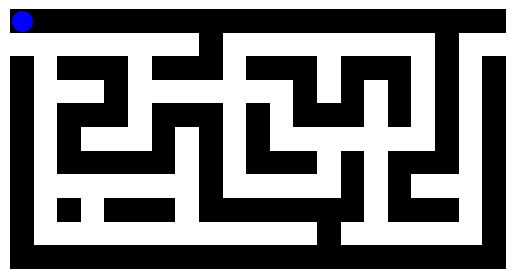

In [37]:
model.display()

In [38]:
print('Present state:', model.state)

Present state: [0 0]


In [39]:
state = model.state
reward = model.get_reward(state)
print('Reward:', reward)

Reward: -1


In [40]:
model.get_actions(state)

[(1, 0)]

In [41]:
action = (0, 1)
model.step(action)

(-1, False)

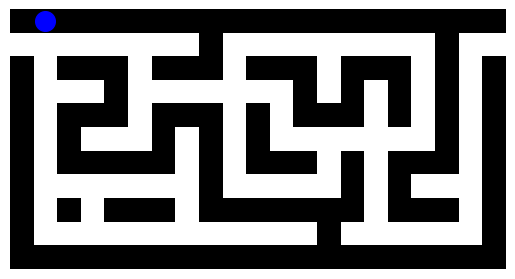

In [42]:
model.display()

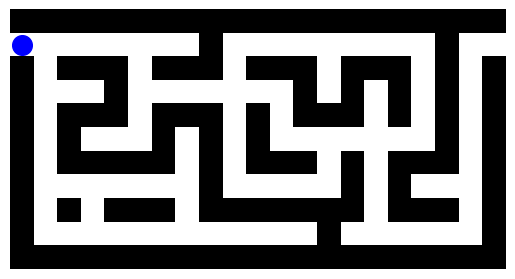

In [43]:
# agent with random policy
agent = Agent(model)
stop, states, rewards = agent.get_episode()
animation = model.display(states)
animation

In [44]:
# time in the Maze
-np.sum(rewards)

101

In [45]:
agent.get_gains(n_steps=1000, n_runs=1000).mean()

-963.126

### Weighted random policy

In [113]:
weights = {(0, 1): 2, (1, 0): 2, (0, -1): 1, (-1, 0): 1}

In [114]:
def weighted_random_policy(state, weights=weights):
    actions = Maze().get_actions(state)
    probs = np.array([weights[action] for action in actions]).astype(float)
    probs /= np.sum(probs)
    return probs, actions

In [48]:
agent = Agent(model, policy=weighted_random_policy)

In [49]:
agent.get_gains(n_steps=1000, n_runs=1000).mean()

-958.624

## Games

In most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (let your adversary play :-),
* you can also impose an action to your adversary (useful for training).

Each game is an object of the class ``Game``. 

Note that the method ``get_actions`` gives all possible moves (even if it is not your turn).

In [50]:
methods_game = [method for method in dir(Game) if '__' not in method]
methods_game

['Board_Size',
 'decode',
 'display',
 'encode',
 'get_actions',
 'get_model',
 'get_next_state',
 'get_reward',
 'get_states',
 'get_transition',
 'init_state',
 'is_game',
 'is_terminal',
 'reinit_state',
 'step']

The method ``get_next_state`` allows you to get the next state for any (state, action) pair, without modifying the current state.

In [51]:
set(methods_game) - set(methods_environment)

{'Board_Size', 'get_next_state'}

## Tic-Tac-Toe

### Play first

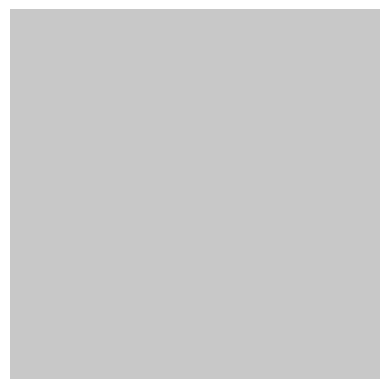

In [52]:
# game against a random player (default)
game = TicTacToe()
game.display()

In [53]:
# next player, board
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [54]:
game.get_actions(game.state)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [55]:
game.get_next_state(game.state, (1,1))

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [56]:
# the state is not modified
game.state

(1,
 array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]))

In [57]:
# you play at random (default)
agent = Agent(game)

In [58]:
# you play as player 1 (default)
agent.player

1

In [59]:
# your adversary plays as player -1
game.adversary.player

-1

In [60]:
state = game.state
action = agent.get_action(state)
action

(1, 1)

In [61]:
reward, stop = game.step(action)
print('Reward:', reward)
print('Stop:', stop)

Reward: 0
Stop: False


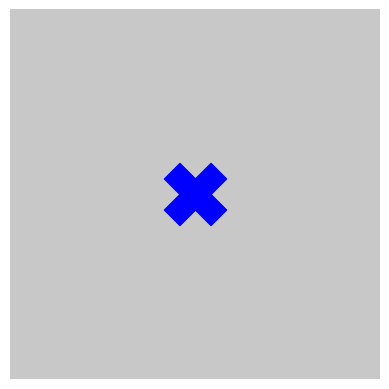

In [62]:
# you're blue
game.display()

In [63]:
game.state

(-1,
 array([[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]]))

In [64]:
# all possible moves
game.get_actions(game.state)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]

In [65]:
# your moves (not your turn -> pass)
agent.get_actions(game.state)

[None]

In [66]:
action = agent.get_action(game.state)
print(action)

None


In [67]:
reward, stop = game.step(action)

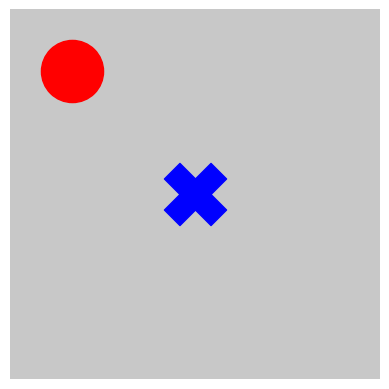

In [68]:
game.display()

In [69]:
stop, states, rewards = agent.get_episode()

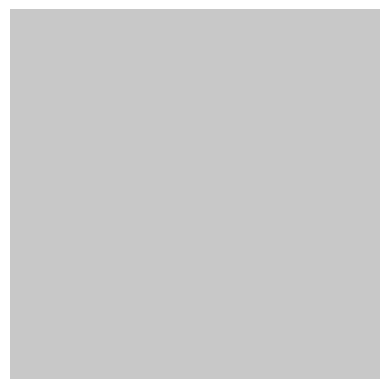

In [70]:
animation = game.display(states)
animation

In [71]:
rewards

[0, 0, 0, 0, 0, 1]

In [72]:
gains = agent.get_gains(n_runs=1000)
np.unique(gains, return_counts=True)

(array([-1,  0,  1]), array([271, 128, 601], dtype=int64))

### Play second

In [73]:
# your adversary starts
game = TicTacToe(play_first=False)
game.first_player

-1

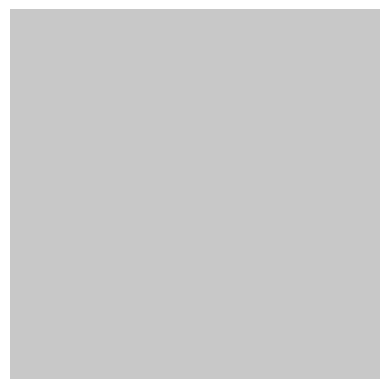

In [74]:
# you still play at random
agent = Agent(game)
stop, states, rewards = agent.get_episode()
animation = game.display(states)

# you're still blue, red starts
animation

In [75]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 1]

In [76]:
gains = agent.get_gains(n_runs=1000)
np.unique(gains, return_counts=True)

(array([-1,  0,  1]), array([604, 132, 264], dtype=int64))

### Control your adversary

You can force the actions of your adversary (useful for training).

In [77]:
game = TicTacToe()
actions = [(0, 0), (1, 1), (0, 2),  (2, 2), (0, 1)]

for action in actions:
    game.step(action)

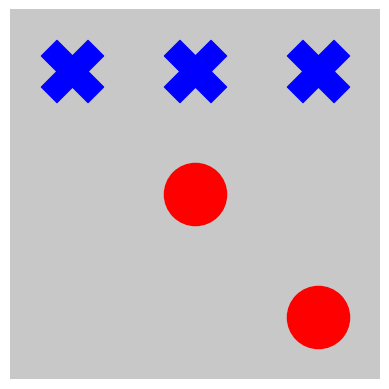

In [78]:
game.display()

### One step ahead

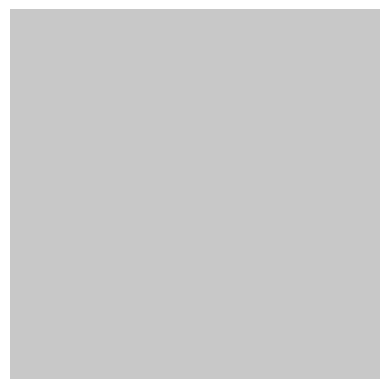

In [79]:
# your adversary is random
game = TicTacToe()

# you play with one-step ahead policy
agent = Agent(game, 'one_step')

stop, states, rewards = agent.get_episode()

animation = game.display(states)
animation

In [80]:
gains = agent.get_gains(n_runs=1000)
np.unique(gains, return_counts=True)

(array([-1,  0,  1]), array([ 14,  92, 894], dtype=int64))

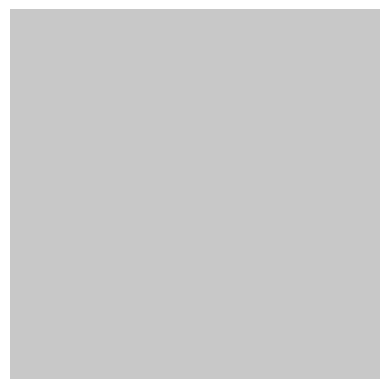

In [81]:
# your adversary also looks one-step ahead
game = TicTacToe(adversary_policy='one_step')

agent = Agent(game, 'one_step')

stop, states, rewards = agent.get_episode()

animation = game.display(states)
animation

In [82]:
gains = agent.get_gains(n_runs=10000)
np.unique(gains, return_counts=True)

(array([-1,  0,  1]), array([1675, 5214, 3111], dtype=int64))

## Nim

### Random players

Present state: (1, array([1, 3, 5, 7]))


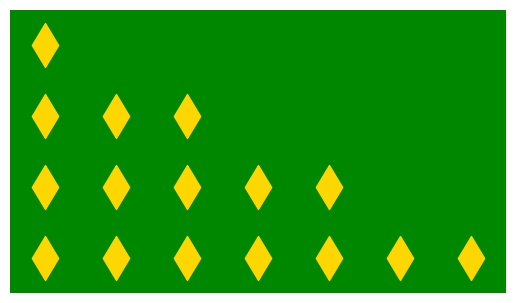

In [83]:
# game against a random player (default)
game = Nim()

print('Present state:', game.state)

game.display()

In [84]:
# you play at random
agent = Agent(game)

state = game.state
action = agent.get_action(state)
print('Next action:', action)

Next action: (3, 6)


In [85]:
reward, stop = game.step(action)
print('Reward:', reward)
print('Stop:', stop)

Reward: 0
Stop: False


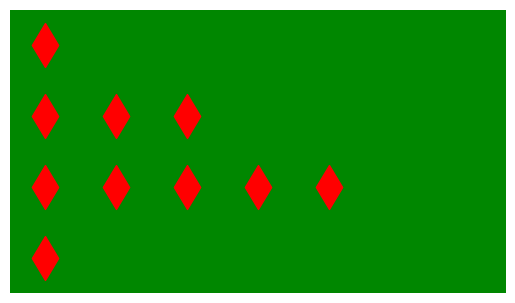

In [86]:
game.display()

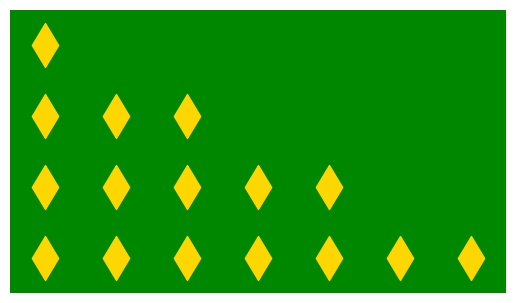

In [87]:
stop, states, rewards = agent.get_episode()

animation = game.display(states)
animation

In [88]:
rewards

[0, 0, 0, 0, 0, 0, 1]

In [89]:
np.unique(agent.get_gains(n_runs=10000), return_counts=True)

(array([-1,  1]), array([5010, 4990], dtype=int64))

### One step ahead

In [90]:
game = Nim('one_step')
agent = Agent(game, 'one_step')
np.unique(agent.get_gains(n_runs=10000), return_counts=True)

(array([-1,  1]), array([4943, 5057], dtype=int64))

## Connect Four

### Random players

Present state: (1, array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]]))


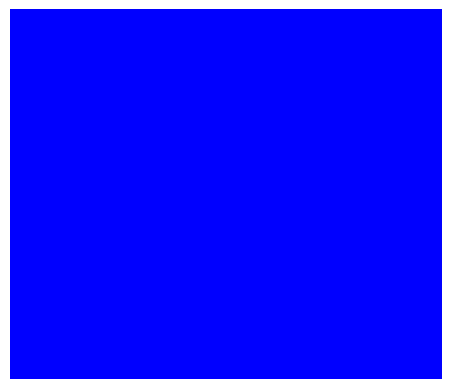

In [91]:
# game against a random player
game = ConnectFour()
print('Present state:', game.state)
game.display()

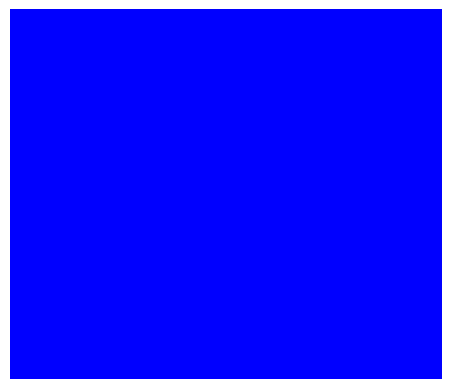

In [92]:
# you play at random
agent = Agent(game)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

In [93]:
np.unique(agent.get_gains(n_runs=1000), return_counts=True)

(array([-1,  0,  1]), array([438,   1, 561], dtype=int64))

### One step ahead

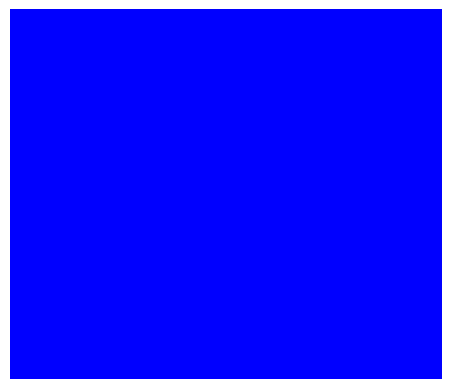

In [94]:
game = ConnectFour('one_step')
agent = Agent(game, 'one_step')
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

In [95]:
np.unique(agent.get_gains(n_runs=1000), return_counts=True)

(array([-1,  0,  1]), array([455,  41, 504], dtype=int64))

## Five-in-a-row

### Random players

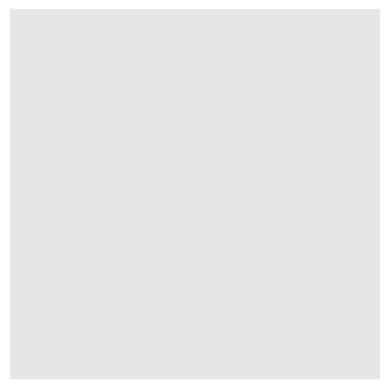

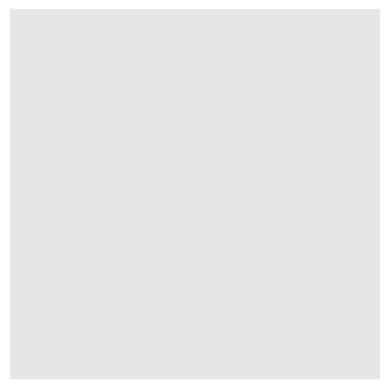

In [96]:
game = FiveInRow()
game.display()
agent = Agent(game)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

In [97]:
np.unique(agent.get_gains(n_runs=1000), return_counts=True)

(array([-1,  1]), array([506, 494], dtype=int64))

### One step ahead

In [98]:
game = FiveInRow()
agent = Agent(game, 'one_step')
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([1]), array([10], dtype=int64))

In [99]:
# a better adversary
game = FiveInRow('one_step')
agent = Agent(game, 'one_step')
np.unique(agent.get_gains(n_runs=10), return_counts=True)

(array([-1,  0,  1]), array([6, 1, 3], dtype=int64))

## Value function

The value function of a policy can be computed from Bellman's equation, provided the state space is not too large.

In [100]:
model = Walk()
len(model.get_states())

25

### Walk

In [101]:
model = Walk()
agent = Agent(model)
algo = PolicyEvaluation(model, agent.policy)
values = algo.evaluate_policy()
values

array([ 0.43181859,  0.52272758,  0.        , -0.52272758, -0.43181859,
        0.34090959,  0.13636392,  0.        , -0.13636392, -0.34090959,
       -0.5454541 , -0.31818148,  0.        ,  0.31818148,  0.5454541 ,
       -1.65909041, -0.86363608,  0.        ,  0.86363608,  1.65909041,
       -1.56818141, -1.47727242,  0.        ,  1.47727242,  1.56818141])

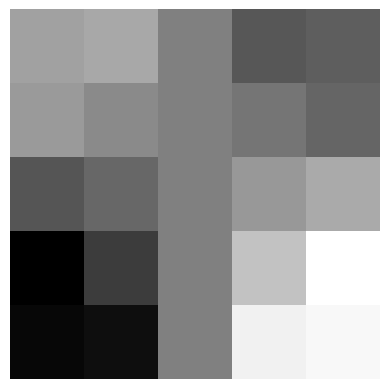

In [102]:
model.display_values(values)

In [ ]:
model = Walk()
agent = Agent(model, policy=weighted_random_policy)
algo = PolicyEvaluation(model, agent.policy)
values = algo.evaluate_policy()
values

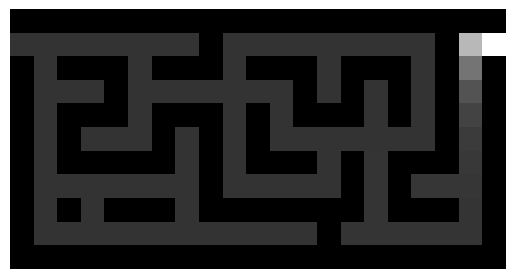

In [112]:
model.display_values(values)

The weighted random policy with the default weights is better than the pure random policy.

### Maze

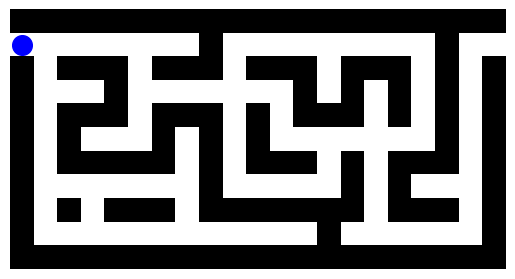

In [116]:
model = Maze()
init_state = (1, 0)
exit_state = (1, 20)
model.set_parameters(maze_map, init_state, [exit_state])
model.display()

In [117]:
agent = Agent(model)
algo = PolicyEvaluation(model, agent.policy)
values = algo.evaluate_policy()
values

array([-99.99978329, -99.99975942, -99.99956294, -99.99927761,
       -99.99886232, -99.99823604, -99.99860723, -99.99871982,
       -99.97825655, -99.98040765, -99.97962455, -99.97594923,
       -99.96878332, -99.95007613, -99.92509067, -99.89163764,
       -99.84615032, -15.537674  ,   0.        , -99.99986043,
       -99.99680052, -99.97312928, -99.97419118, -99.78506204,
       -29.2514269 , -99.99992987, -99.99994835, -99.99995374,
       -99.9948374 , -99.99015564, -99.98403583, -99.9758031 ,
       -99.96435049, -99.93459428, -99.89741412, -99.97587288,
       -99.14325789, -99.70264463, -41.31413333, -99.99995776,
       -99.99641128, -99.96522158, -99.84971292, -99.11035048,
       -99.59316992, -51.89866792, -99.999975  , -99.99810195,
       -99.99793582, -99.99738856, -99.99999994, -99.96150292,
       -99.78689292, -99.70435634, -99.59509743, -99.32824857,
       -99.00867998, -99.25735111, -99.44771353, -61.16863587,
       -99.99998634, -99.99999993, -99.9529316 , -99.70

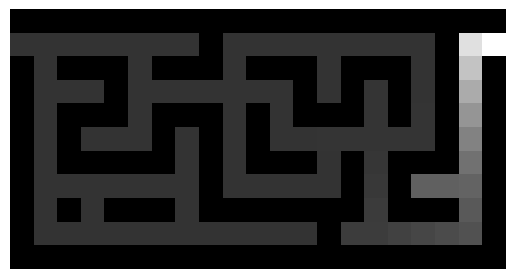

In [118]:
model.display_values(values)

In [119]:
#weights = {(0, 1): 3, (1, 0): 4, (0, -1): 1, (-1, 0): 5}
#weights = {(0, 1): 3, (1, 0): 4, (0, -1): 1, (-1, 0): 5}
#weights = {(0, 1): 1, (1, 0): 2, (0, -1): 3, (-1, 0): 4}
#weights = {(0, 1): 2, (1, 0): 3, (0, -1): 4, (-1, 0): 5}
#weights = {(0, 1): 1, (1, 0): 3, (0, -1): 4, (-1, 0): 5}
#weights = {(0, 1): 1, (1, 0): 2, (0, -1): 4, (-1, 0): 5}
#weights = {(0, 1): 1, (1, 0): 2, (0, -1): 3, (-1, 0): 5}
#weights = {(0, 1): 1, (1, 0): 2, (0, -1): 3, (-1, 0): 4}

agent = Agent(model, policy=weighted_random_policy)
algo = PolicyEvaluation(model, agent.policy)
values = algo.evaluate_policy()
values

array([ -99.99742925,  -99.99720383,  -99.99477999,  -99.99292359,
        -99.99119773,  -99.98931853,  -99.99226855,  -99.99281845,
        -99.95639536,  -99.96101319,  -99.95958533,  -99.95517313,
        -99.94880136,  -99.92613282,  -99.90876091,  -99.89321819,
        -99.87749088,  -34.72473943,    0.        ,  -99.9989514 ,
        -99.98355297,  -99.94669247,  -99.96095178,  -99.86112167,
        -68.10498768,  -99.99968402,  -99.99978826,  -99.99980721,
        -99.97898141,  -99.96513351,  -99.95504222,  -99.94623076,
        -99.93731127,  -99.90849793,  -99.88741678,  -99.96325615,
        -99.7006469 ,  -99.84338755,  -84.27779226,  -99.999875  ,
        -99.98725956,  -99.94719879,  -99.86930836,  -99.69008611,
        -99.82444897,  -92.09239941,  -99.99995159,  -99.9919599 ,
        -99.99135087,  -99.99002353, -100.        ,  -99.94761295,
        -99.85156938,  -99.83345668,  -99.81413763,  -99.72678997,
        -99.66830696,  -99.76759012,  -99.80382103,  -95.84957

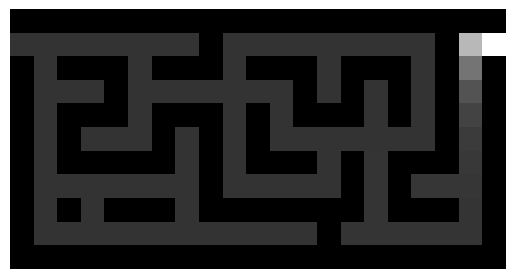

In [120]:
model.display_values(values)

For the maze, it is difficult to find a better policy than the random. I have tried changing the weights of the weighted random policy, but the results were still worst than the ones from the pure random policy.

### TicTacToe

In [121]:
game = TicTacToe()
agent = Agent(game)
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

In [122]:
def sorting_key(item):
    return item[0]

In [123]:
best_first_moves = sorted([(values[index], algo.states[index][0], algo.states[index][1]) for index, (player, array) in enumerate(algo.states) if player == -1 and np.sum(array == 1) == 1], key=sorting_key, reverse=True)
best_first_moves

[(0.49999999999999994,
  -1,
  array([[0, 0, 0],
         [0, 1, 0],
         [0, 0, 0]])),
 (0.34285714285714286,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 1]])),
 (0.3428571428571428,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [1, 0, 0]])),
 (0.3428571428571428,
  -1,
  array([[0, 0, 1],
         [0, 0, 0],
         [0, 0, 0]])),
 (0.34285714285714275,
  -1,
  array([[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0]])),
 (0.2,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]])),
 (0.19999999999999998,
  -1,
  array([[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]])),
 (0.19999999999999998,
  -1,
  array([[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]])),
 (0.19999999999999998,
  -1,
  array([[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]]))]

In [124]:
game = TicTacToe(play_first=False)
agent = Agent(game)
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

In [125]:
best_first_moves = sorted([(values[index], algo.states[index][0], algo.states[index][1]) for index, (player, array) in enumerate(algo.states) if player == -1 and np.sum(array == 1) == 1], key=sorting_key, reverse=True)
best_first_moves

[(0.028571428571428584,
  -1,
  array([[ 0, -1,  0],
         [ 0,  1,  0],
         [ 0,  0,  0]])),
 (0.028571428571428577,
  -1,
  array([[ 0,  0,  0],
         [-1,  1,  0],
         [ 0,  0,  0]])),
 (0.028571428571428567,
  -1,
  array([[ 0,  0,  0],
         [ 0,  1,  0],
         [ 0, -1,  0]])),
 (0.02857142857142856,
  -1,
  array([[ 0,  0,  0],
         [ 0,  1, -1],
         [ 0,  0,  0]])),
 (-0.11428571428571424,
  -1,
  array([[-1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  0]])),
 (-0.11428571428571428,
  -1,
  array([[ 0,  0,  0],
         [ 0,  1,  0],
         [ 0,  0, -1]])),
 (-0.1142857142857143,
  -1,
  array([[ 0,  0, -1],
         [ 0,  1,  0],
         [ 0,  0,  0]])),
 (-0.1142857142857143,
  -1,
  array([[ 0,  0,  0],
         [ 0,  1,  0],
         [-1,  0,  0]])),
 (-0.14285714285714282,
  -1,
  array([[ 0,  0,  0],
         [-1,  0,  0],
         [ 0,  0,  1]])),
 (-0.14285714285714282,
  -1,
  array([[ 0,  0,  1],
         [-1,  0,  0],
         

In [126]:
game = TicTacToe()
agent = Agent(game, 'one_step')
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

In [127]:
best_first_moves = sorted([(values[index], algo.states[index][0], algo.states[index][1]) for index, (player, array) in enumerate(algo.states) if player == -1 and np.sum(array == 1) == 1], key=sorting_key, reverse=True)
best_first_moves

[(0.9539682539682537,
  -1,
  array([[0, 0, 0],
         [0, 1, 0],
         [0, 0, 0]])),
 (0.8987103174603173,
  -1,
  array([[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0]])),
 (0.8987103174603172,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 1]])),
 (0.8987103174603172,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [1, 0, 0]])),
 (0.8987103174603172,
  -1,
  array([[0, 0, 1],
         [0, 0, 0],
         [0, 0, 0]])),
 (0.8483134920634919,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]])),
 (0.8483134920634919,
  -1,
  array([[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]])),
 (0.8483134920634919,
  -1,
  array([[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]])),
 (0.8483134920634919,
  -1,
  array([[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]]))]

In [128]:
game = TicTacToe(adversary_policy='one_step')
agent = Agent(game, 'one_step')
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

In [129]:
best_first_moves = sorted([(values[index], algo.states[index][0], algo.states[index][1]) for index, (player, array) in enumerate(algo.states) if player == -1 and np.sum(array == 1) == 1], key=sorting_key, reverse=True)
best_first_moves

[(0.2583333333333333,
  -1,
  array([[0, 0, 0],
         [0, 1, 0],
         [0, 0, 0]])),
 (0.2349206349206349,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [0, 0, 1]])),
 (0.2349206349206349,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [1, 0, 0]])),
 (0.2349206349206349,
  -1,
  array([[0, 0, 1],
         [0, 0, 0],
         [0, 0, 0]])),
 (0.2349206349206349,
  -1,
  array([[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0]])),
 (0.010019841269841264,
  -1,
  array([[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]])),
 (0.010019841269841264,
  -1,
  array([[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]])),
 (0.010019841269841262,
  -1,
  array([[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]])),
 (0.010019841269841257,
  -1,
  array([[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]]))]

### Nim

In [130]:
game = Nim()
agent = Agent(game)
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

In [131]:
values.sum()

0.0

In [132]:
best_first_moves = sorted([(values[index], algo.states[index][0], algo.states[index][1]) for index, (player, array) in enumerate(algo.states) if player == -1 and np.sum(array == np.array([1, 3, 5, 7])) == 3], key=sorting_key, reverse=True)
best_first_moves

[(0.0, -1, array([0, 3, 5, 7])),
 (0.0, -1, array([1, 0, 5, 7])),
 (0.0, -1, array([1, 1, 5, 7])),
 (0.0, -1, array([1, 2, 5, 7])),
 (0.0, -1, array([1, 3, 0, 7])),
 (0.0, -1, array([1, 3, 1, 7])),
 (0.0, -1, array([1, 3, 2, 7])),
 (0.0, -1, array([1, 3, 3, 7])),
 (0.0, -1, array([1, 3, 4, 7])),
 (0.0, -1, array([1, 3, 5, 0])),
 (0.0, -1, array([1, 3, 5, 1])),
 (0.0, -1, array([1, 3, 5, 2])),
 (0.0, -1, array([1, 3, 5, 3])),
 (0.0, -1, array([1, 3, 5, 4])),
 (0.0, -1, array([1, 3, 5, 5])),
 (0.0, -1, array([1, 3, 5, 6]))]

In [133]:
game = Nim('one_step')
agent = Agent(game, 'one_step')
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

In [134]:
values.sum()

0.0

In [135]:
best_first_moves = sorted([(values[index], algo.states[index][0], algo.states[index][1]) for index, (player, array) in enumerate(algo.states) if player == -1 and np.sum(array == np.array([1, 3, 5, 7])) == 3], key=sorting_key, reverse=True)
best_first_moves

[(0.0, -1, array([0, 3, 5, 7])),
 (0.0, -1, array([1, 0, 5, 7])),
 (0.0, -1, array([1, 1, 5, 7])),
 (0.0, -1, array([1, 2, 5, 7])),
 (0.0, -1, array([1, 3, 0, 7])),
 (0.0, -1, array([1, 3, 1, 7])),
 (0.0, -1, array([1, 3, 2, 7])),
 (0.0, -1, array([1, 3, 3, 7])),
 (0.0, -1, array([1, 3, 4, 7])),
 (0.0, -1, array([1, 3, 5, 0])),
 (0.0, -1, array([1, 3, 5, 1])),
 (0.0, -1, array([1, 3, 5, 2])),
 (0.0, -1, array([1, 3, 5, 3])),
 (0.0, -1, array([1, 3, 5, 4])),
 (0.0, -1, array([1, 3, 5, 5])),
 (0.0, -1, array([1, 3, 5, 6]))]

### ConnectFour

ValueError: Not available. The state space might be too large.

### Five in a row

ValueError: Not available. The state space might be too large.